<a href="https://colab.research.google.com/github/arcadelab/deepdrr/blob/dev/deepdrr_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycuda # install cuda
!pip install -U git+https://github.com/arcadelab/deepdrr@dev # install deepdrr latest
!sudo apt-get install libgl1-mesa-dev xvfb # install headless display tools

  Cloning https://github.com/arcadelab/deepdrr (to revision dev) to /tmp/pip-req-build-7ozox5lh
  Running command git clone -q https://github.com/arcadelab/deepdrr /tmp/pip-req-build-7ozox5lh
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
  Created wheel for deepdrr: filename=deepdrr-1.1.0a2-cp37-none-any.whl size=529062 sha256=7ff54f86bd438c1cc180018d67aab8a9921bc09c103a45591353499b38027ebf
  Stored in directory: /tmp/pip-ephem-wheel-cache-8pg8w3bh/wheels/c2/f7/55/c02355edd2a1a1ed71b350f5426289037d68e150ec5746194b
Successfully built deepdrr
  Found existing installation: deepdrr 1.1.0a2
    Uninstalling deepdrr-1.1.0a2:
      Successfully uninstalled deepdrr-1.1.0a2
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
xvfb is already the newest version (2:1.19.6-1

In [1]:
import numpy as np
from PIL import Image
import deepdrr
from deepdrr import geo
from deepdrr.utils import test_utils
from IPython.display import display

In [2]:
path = test_utils.download_sampledata("CTPelvic1K_sample") / "dataset6_CLINIC_0001_data.nii.gz"

Using downloaded and verified file: /home/killeen/datasets/DeepDRR_Data/CTPelvic1K_dataset6_CLINIC_0001.zip


In [15]:
volume = deepdrr.Volume.from_nifti(path)
volume.supine()
carm = deepdrr.MobileCArm(isocenter=volume.center_in_world, alpha=0, beta=0, degrees=True)

Projecting at z=-500


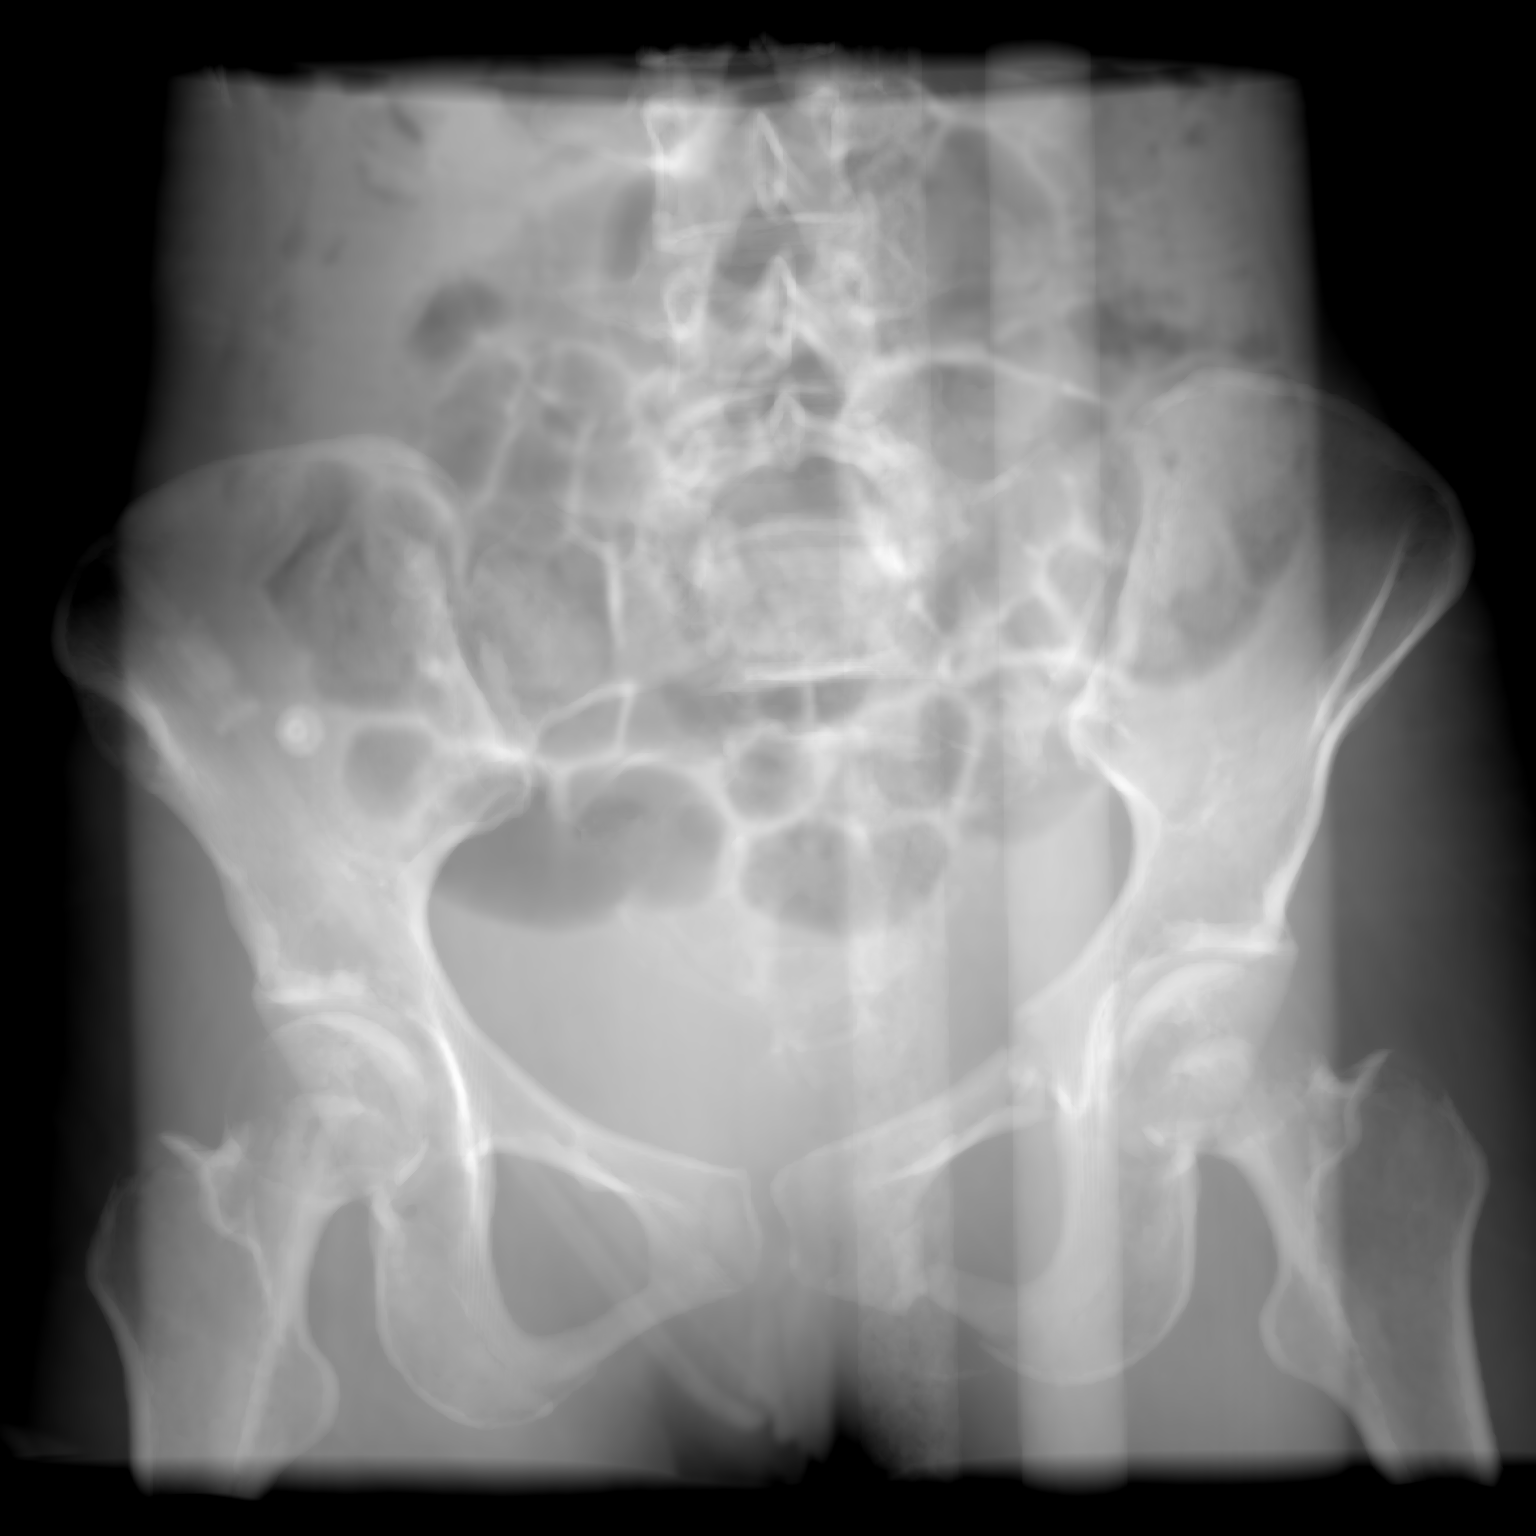

Projecting at z=-450


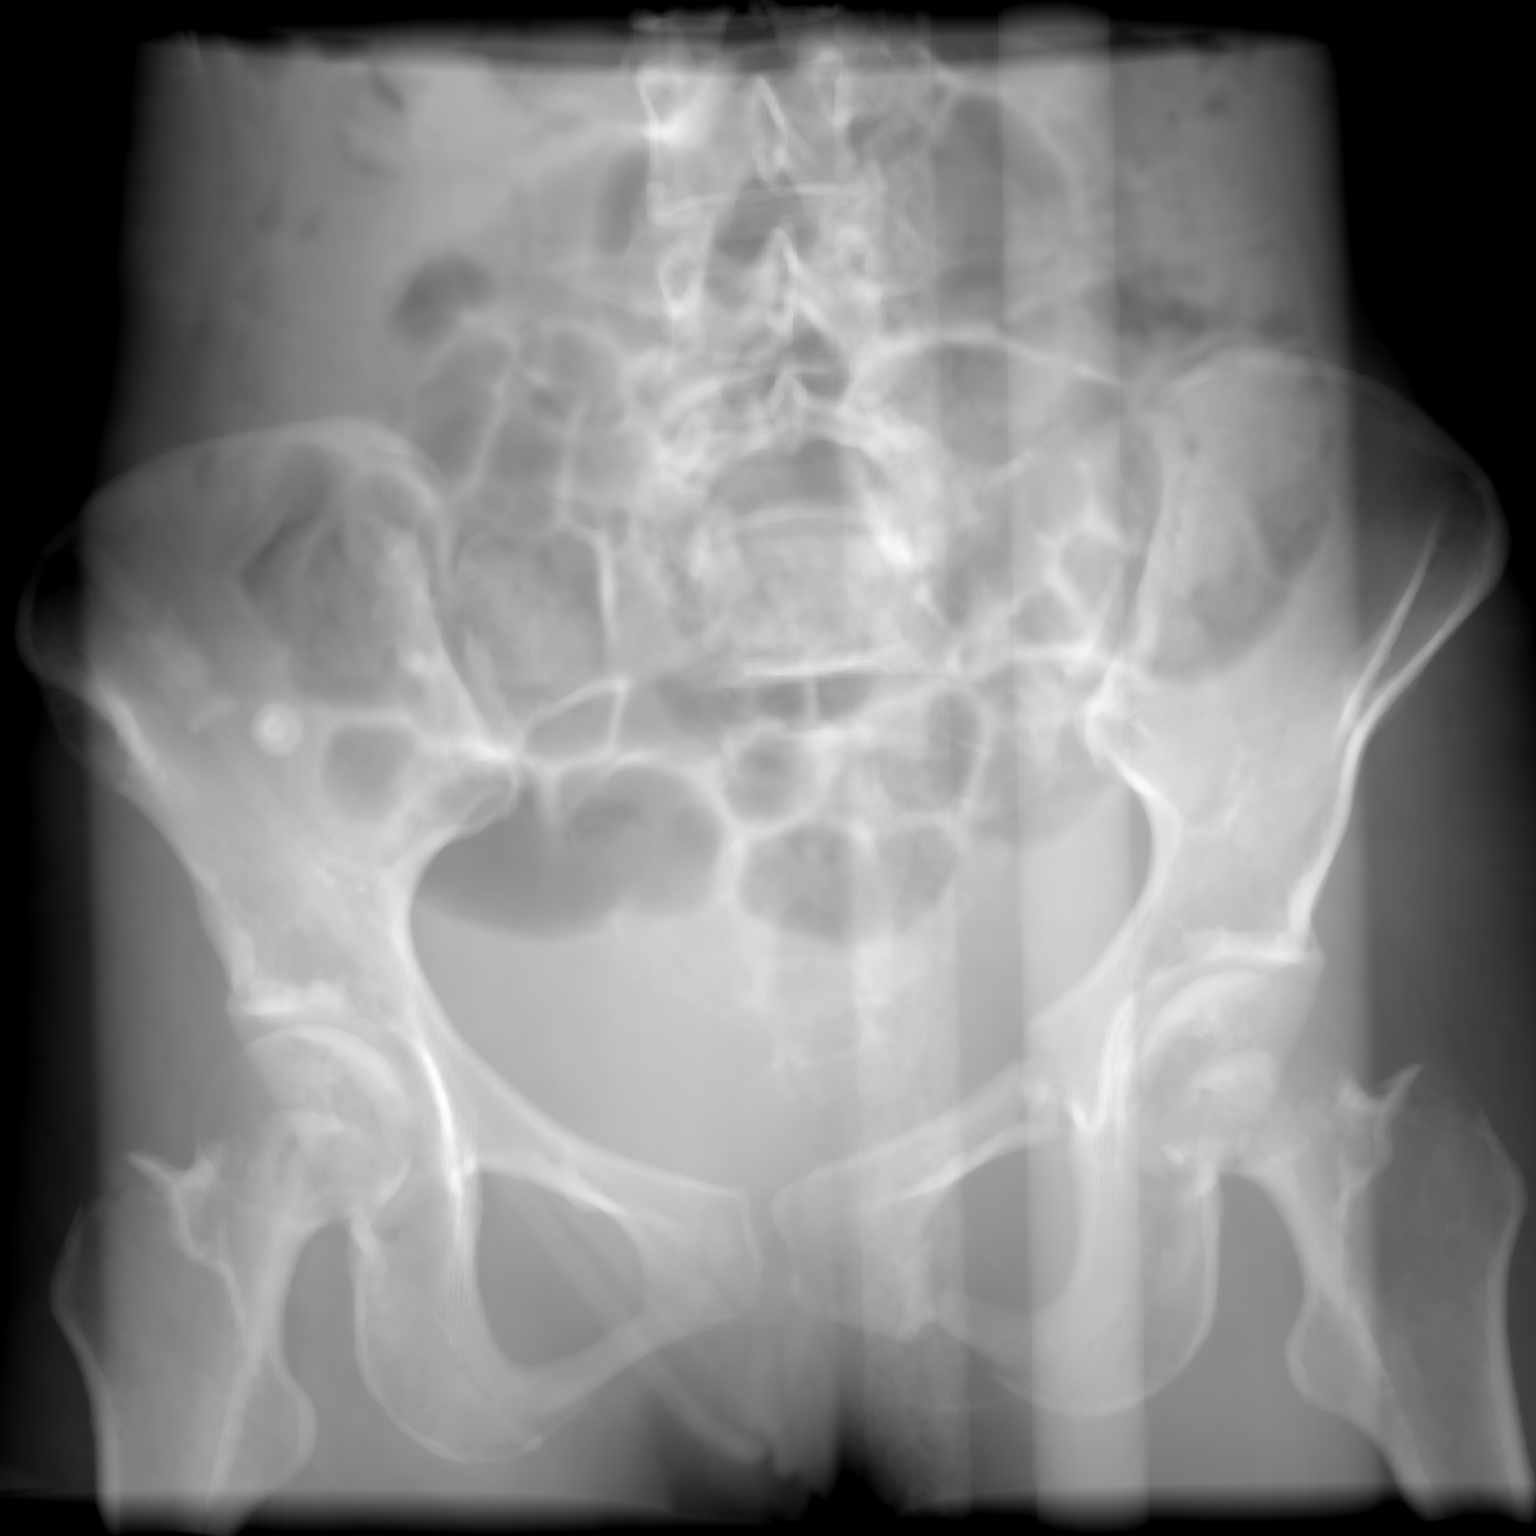

Projecting at z=-400


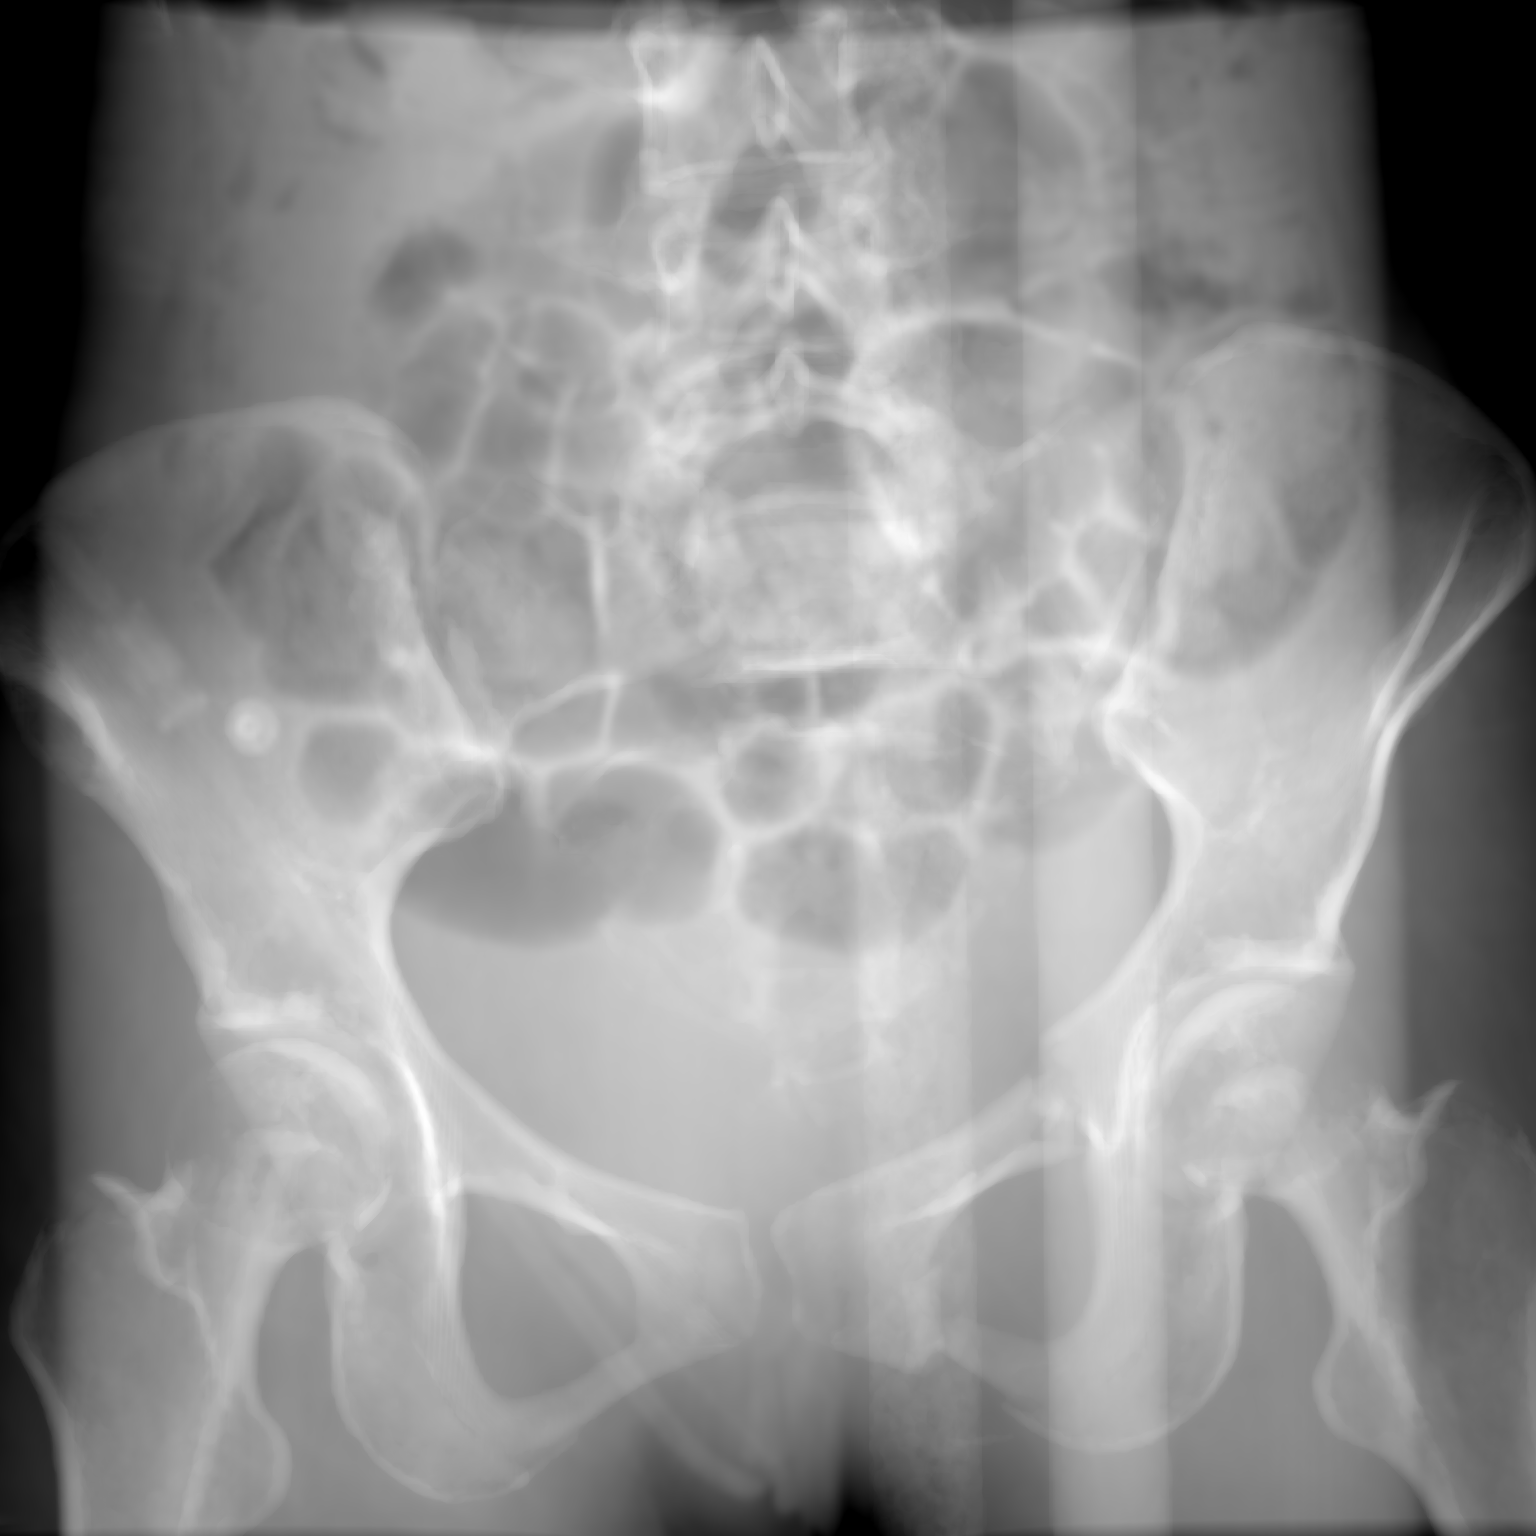

Projecting at z=-350


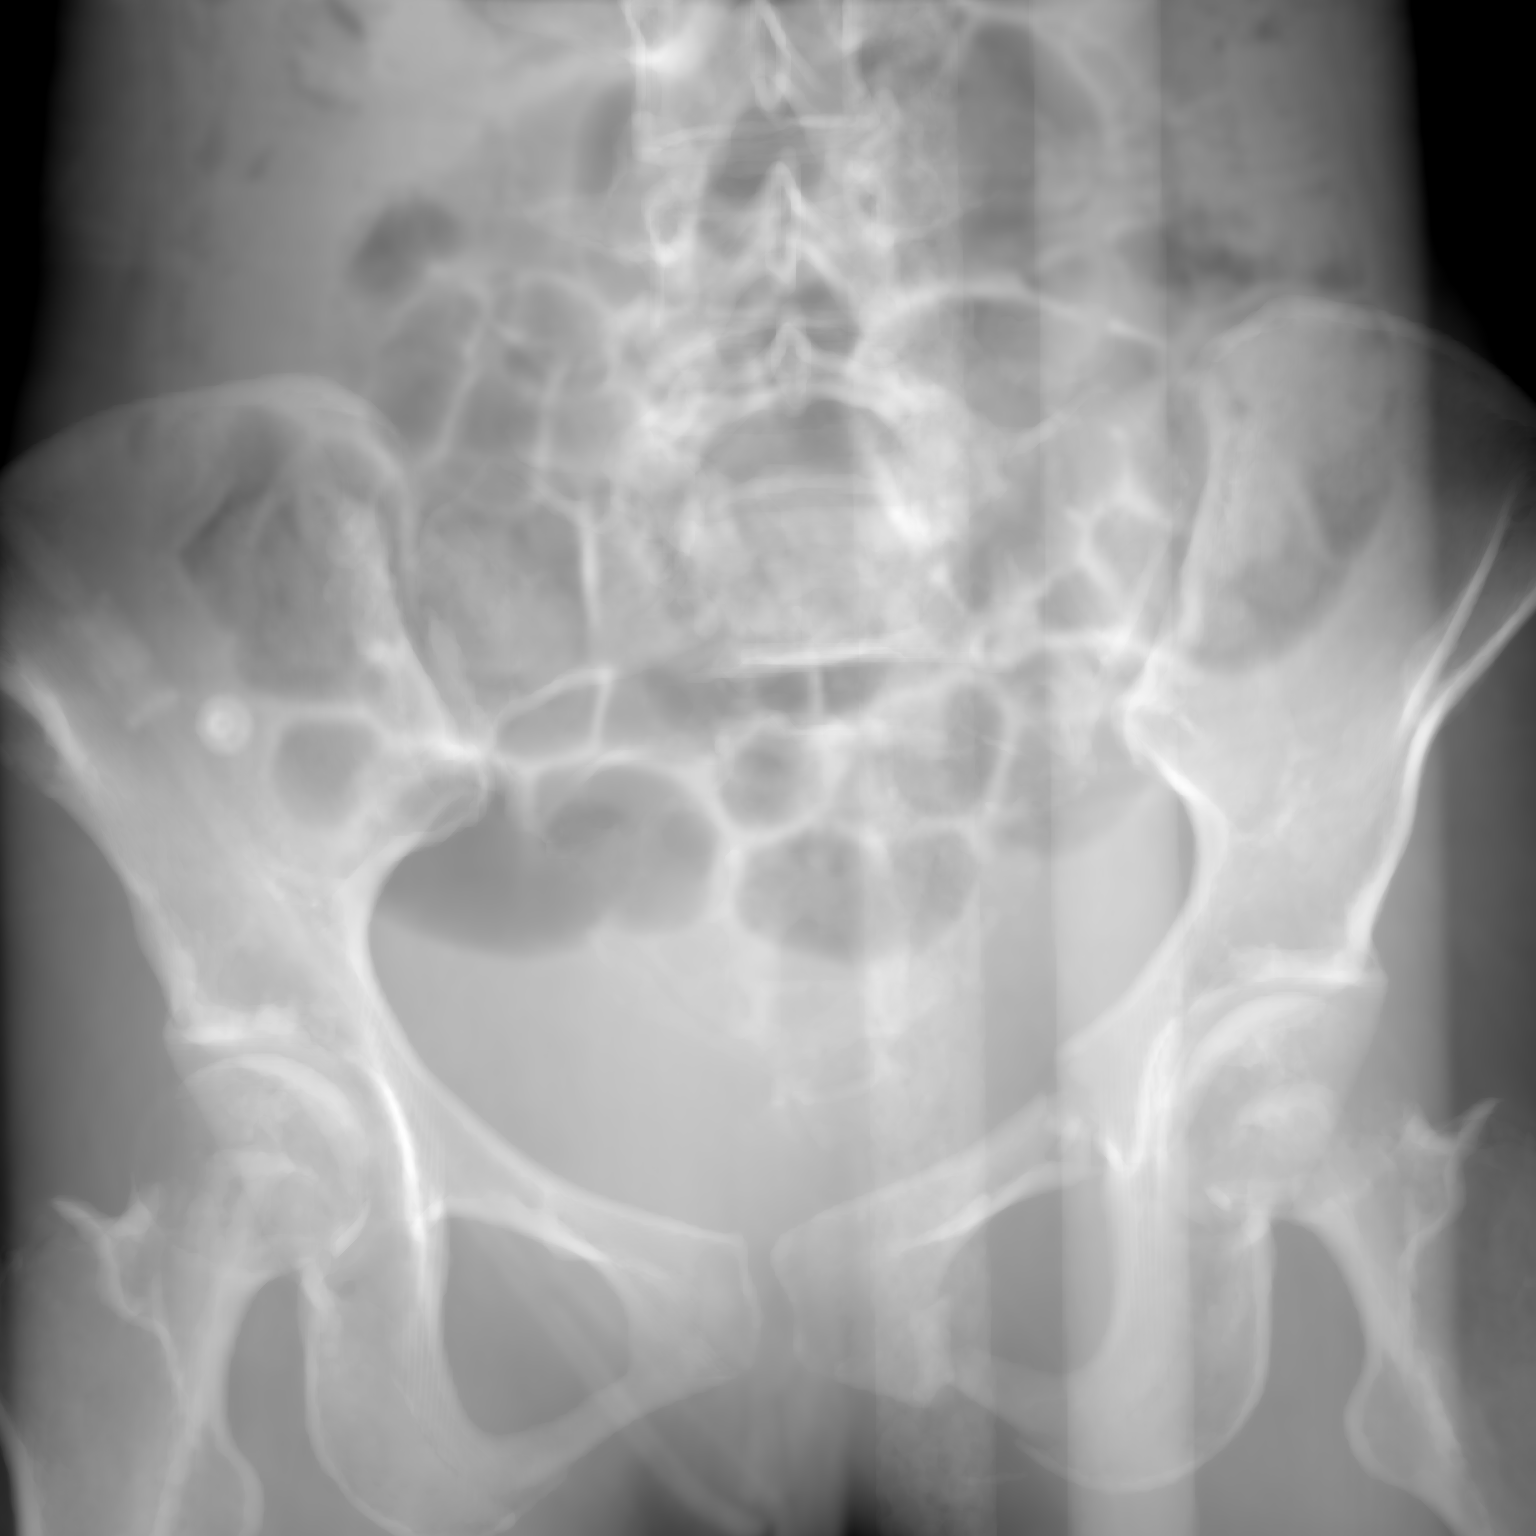

Projecting at z=-300


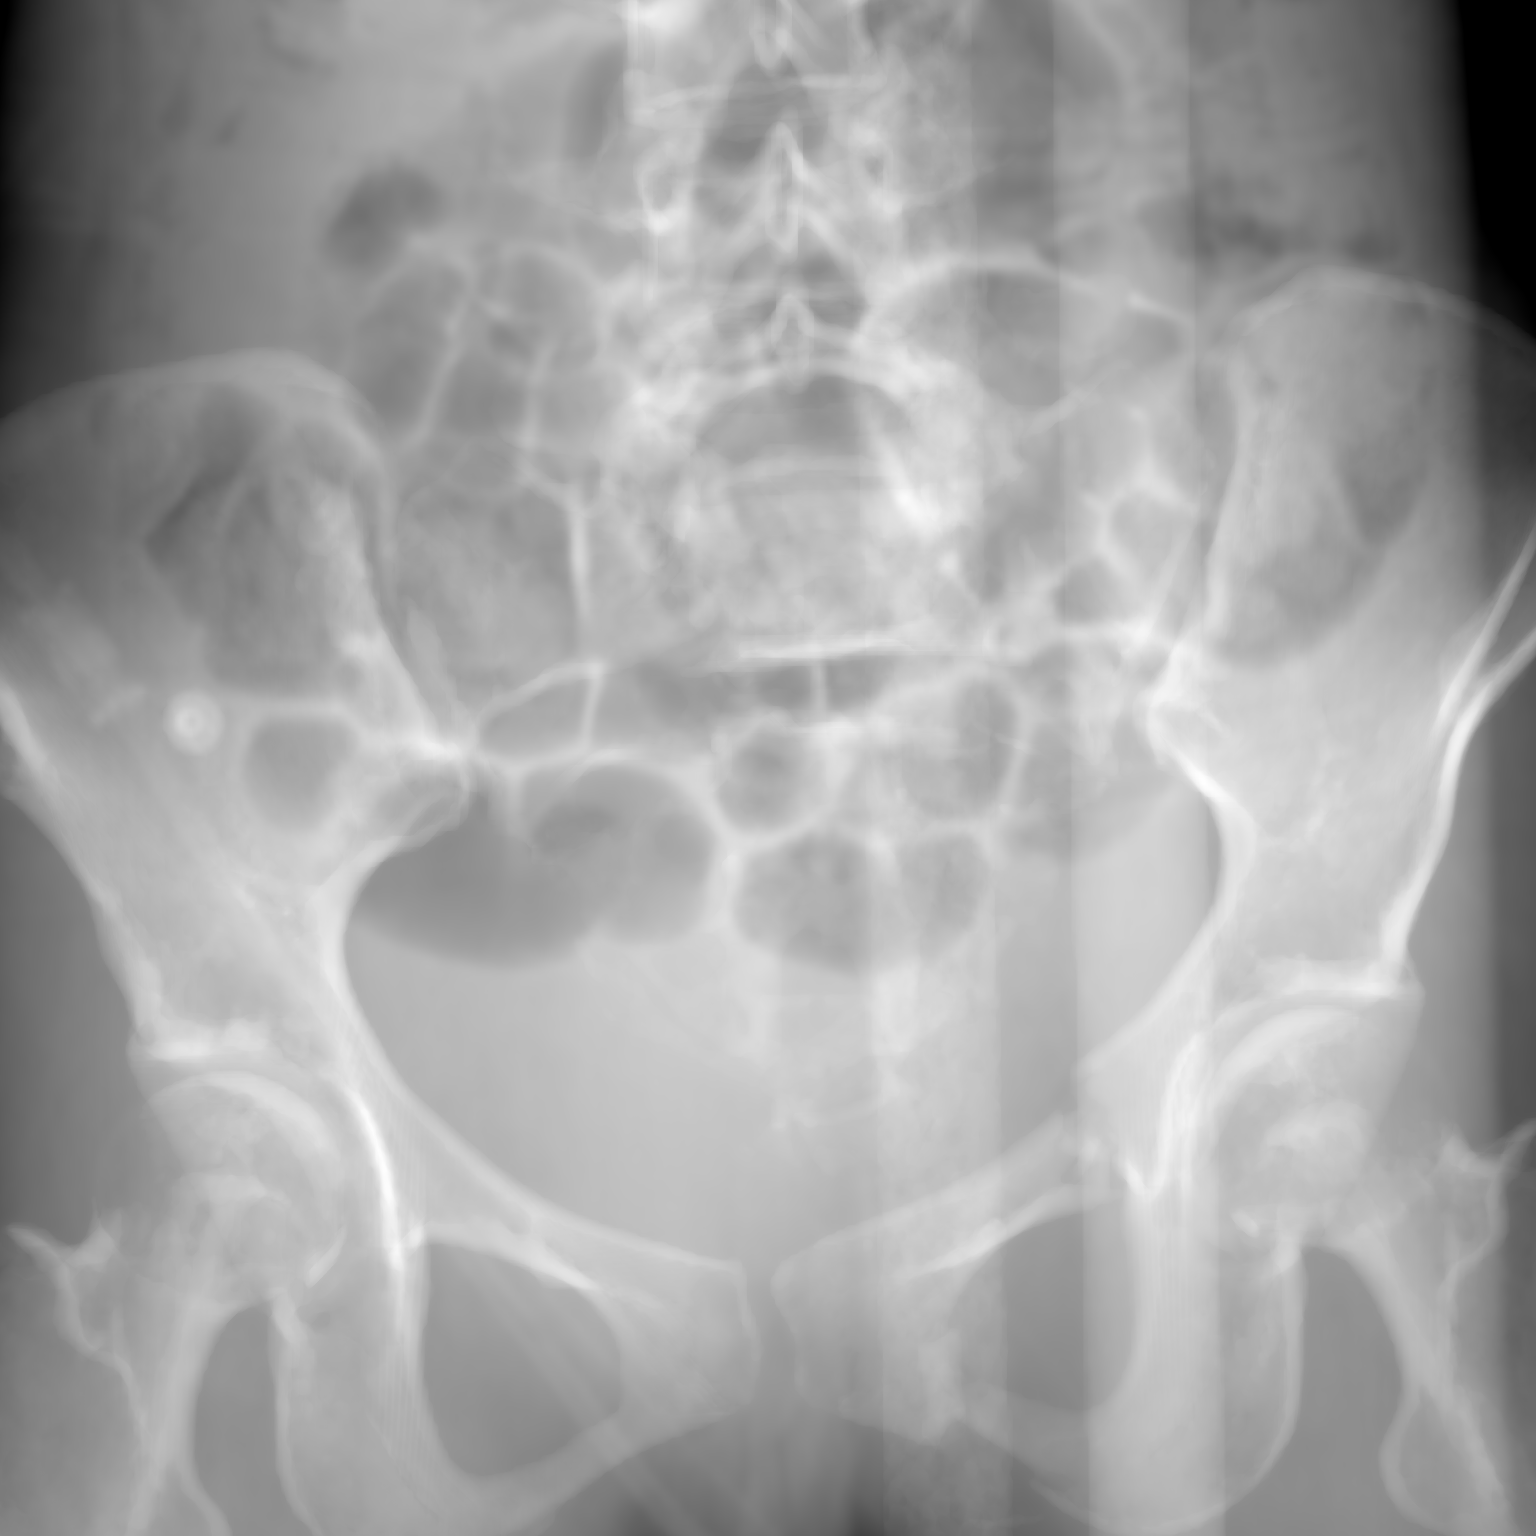

Projecting at z=-250


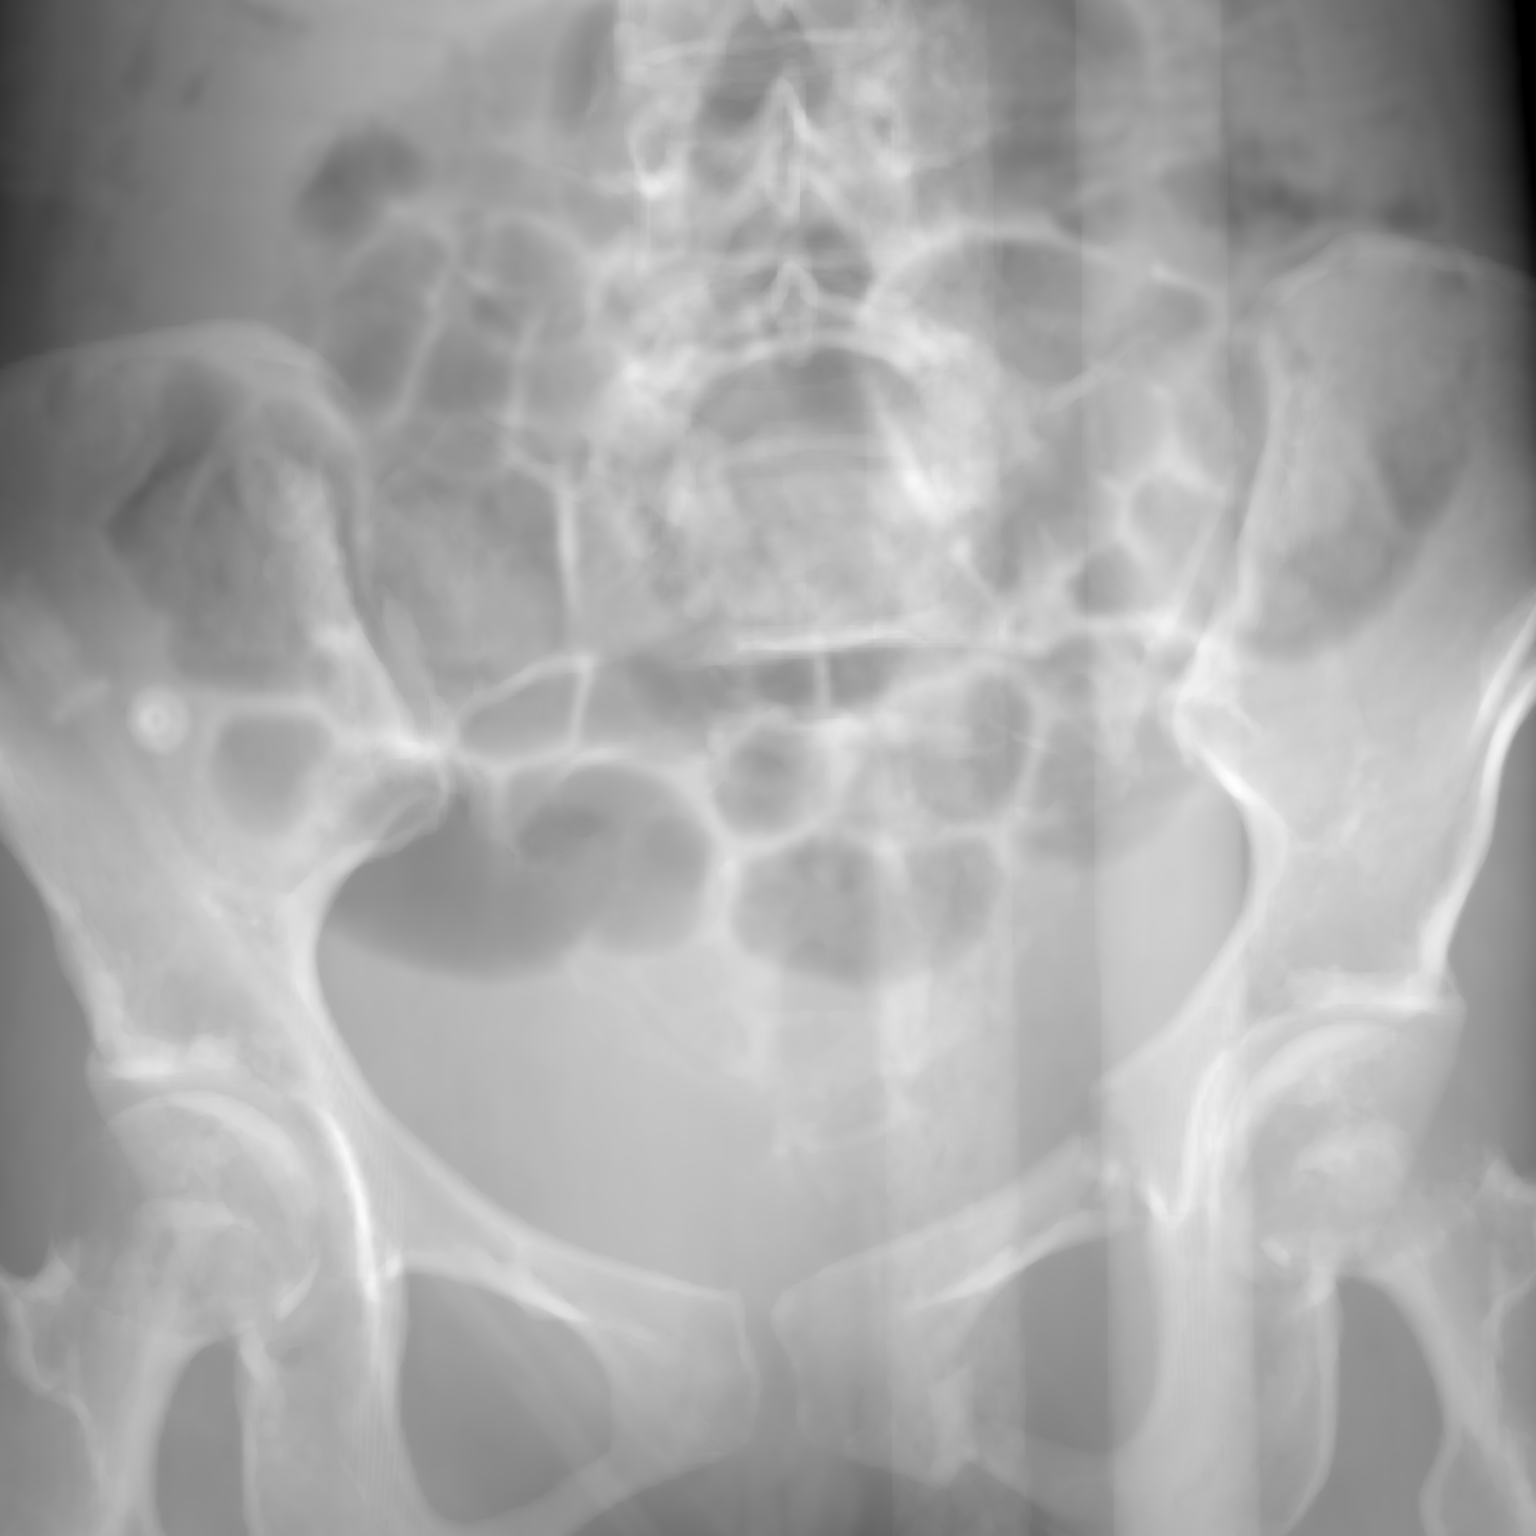

Projecting at z=-200


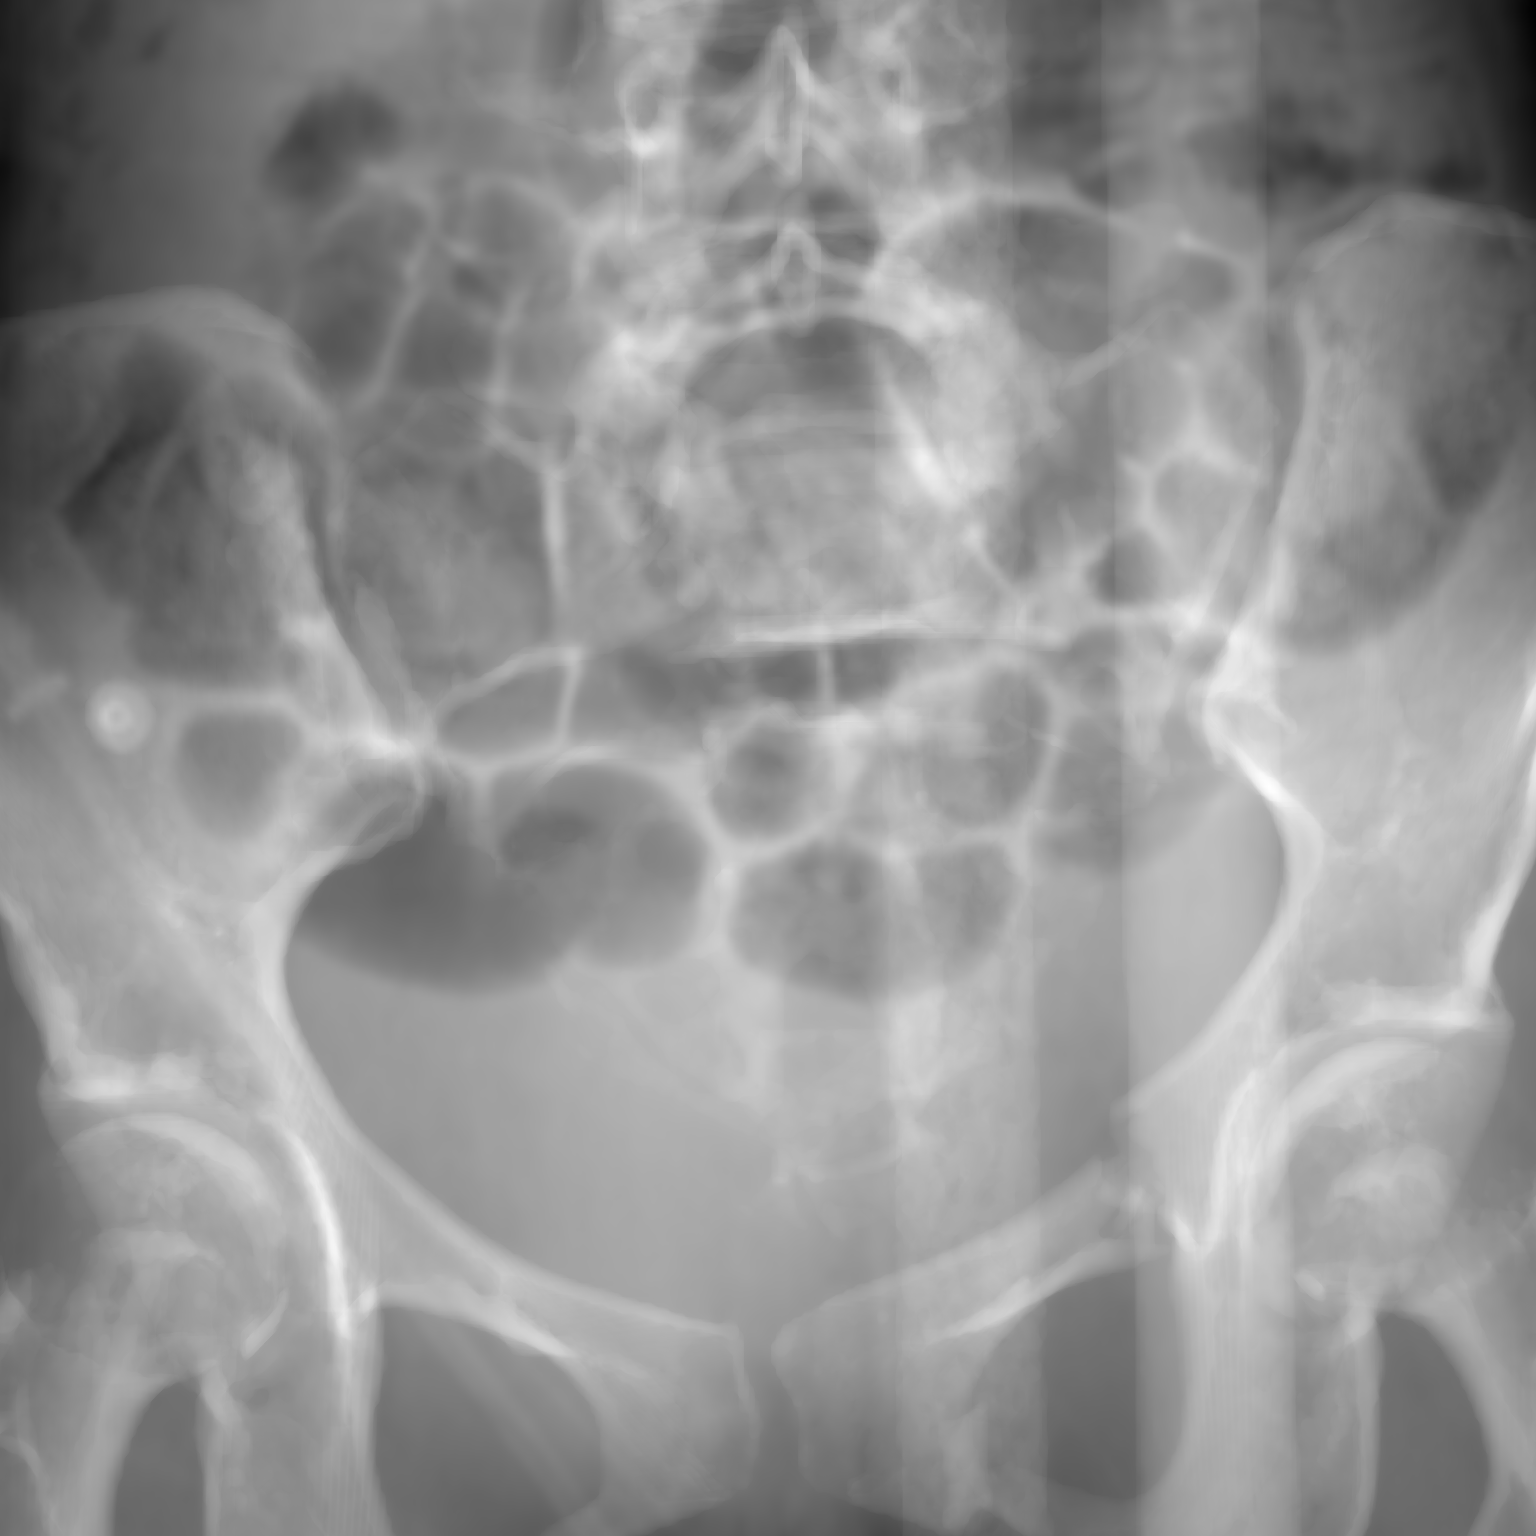

Projecting at z=-150


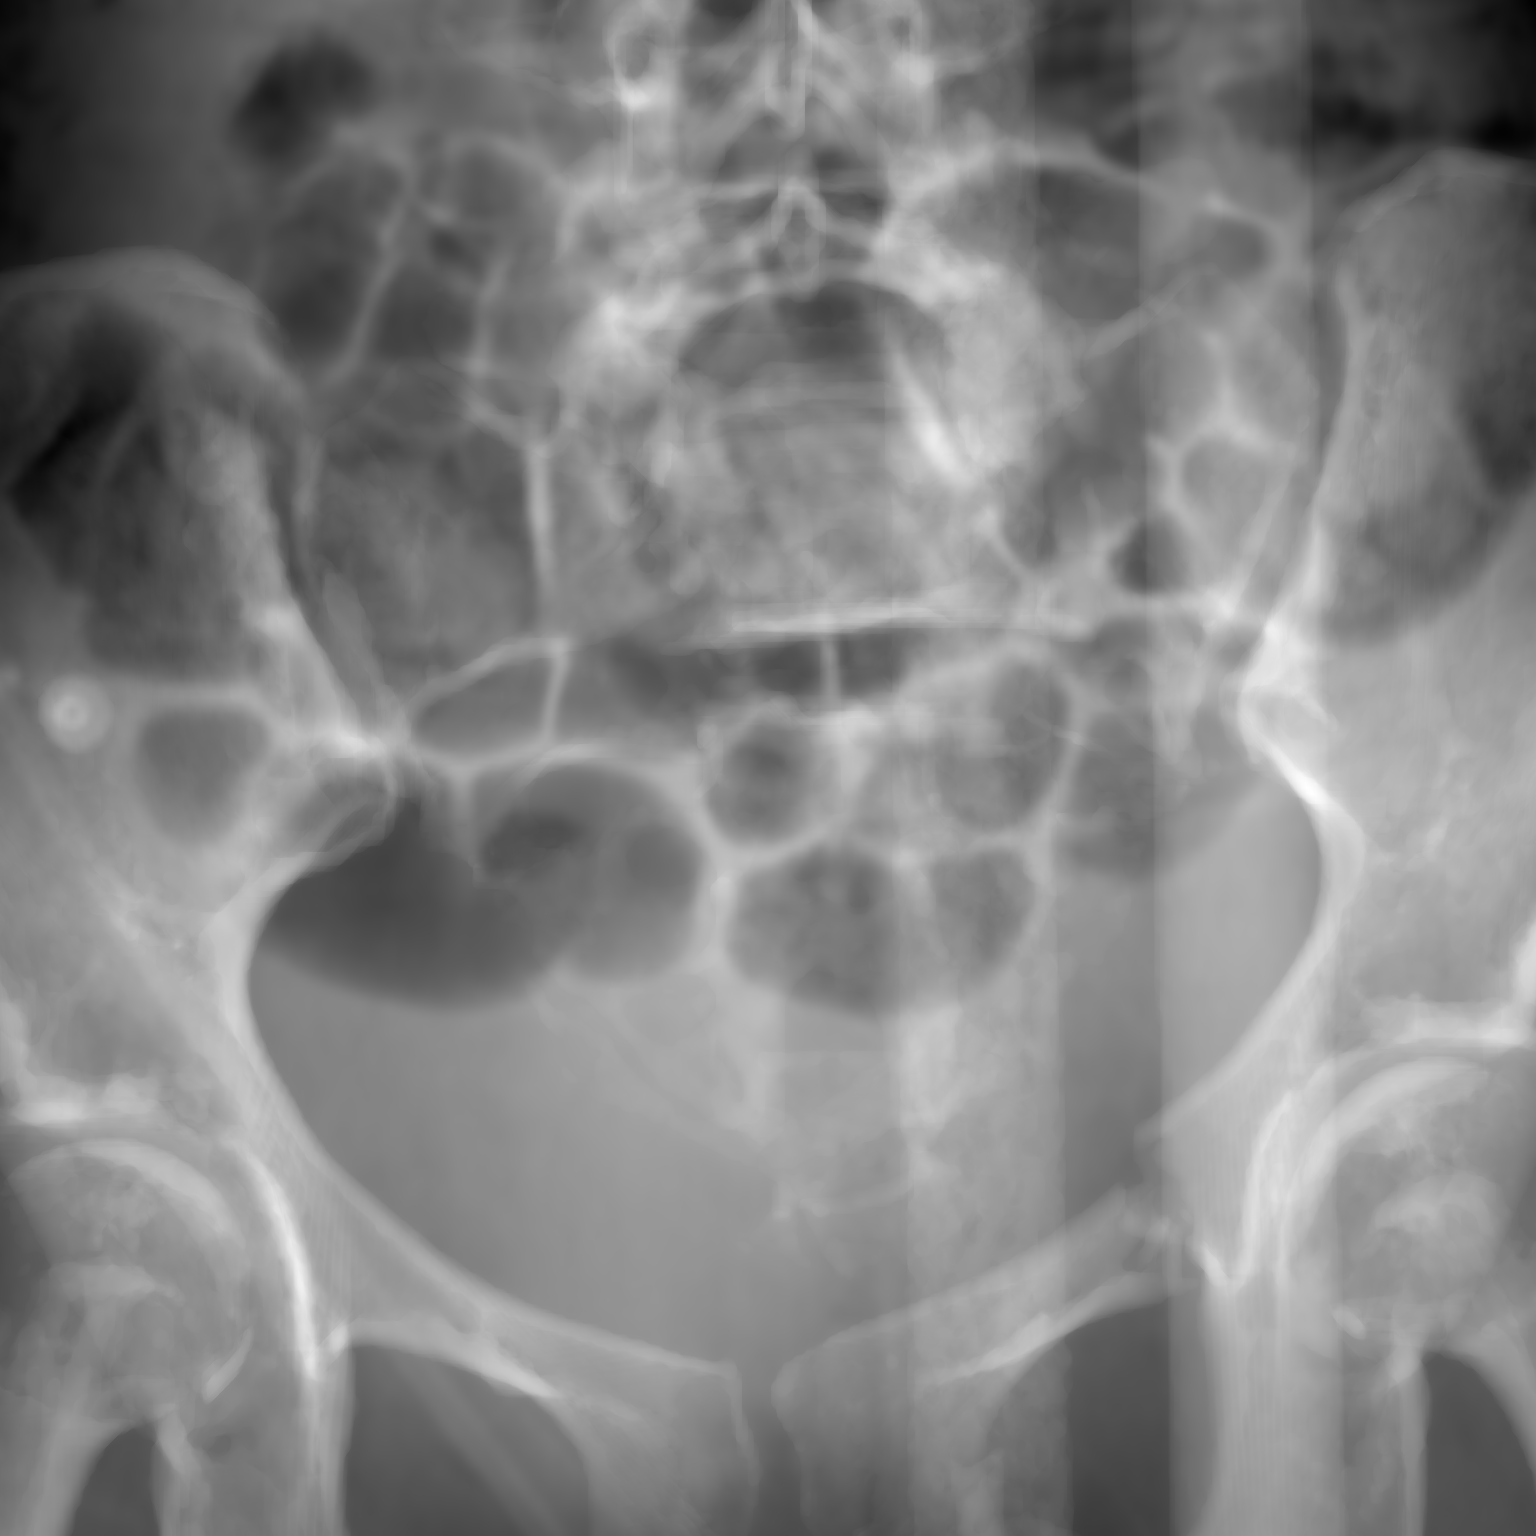

In [19]:
with deepdrr.Projector(
    volume=volume,
    carm=carm,
    step=0.1,  # stepsize along projection ray, measured in voxels
    spectrum="90KV_AL40", # energy spectrum
    photon_count=100000, # number of photons to simulate
    scatter_num=0, # number of scatter events to simulate
    neglog=True, # apply negative log transform to image (convenient for visualization)
    intensity_upper_bound=3, # Good default for windowing
) as projector:
    for z in range(-500, -100, 50):
        carm.move_to(isocenter_in_world=volume.center_in_world + geo.v(0, 0, z))
        print(f"Projecting at z={z}")
        image = projector.project()
        display(Image.fromarray((image * 255).astype(np.uint8)))
        